In [16]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [17]:
target_user = ["@BBCWorld", "@CBSNews", "@FoxNews", "@CNN", "@NYTimes"]

sentiments = []

for user in target_user:

    counter = 1
    
    public_tweets = api.user_timeline(user, count = 100)

    for tweet in public_tweets:

        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                           "User": user})
        
        counter += 1
        
sentiments_pd = pd.DataFrame.from_dict(sentiments)
mean_sentiments = sentiments_pd.groupby(["User"]).mean()
mean_sentiments = mean_sentiments.reset_index()
mean_sentiments.head()

sentiments_pd.to_csv("tweet_sentiments.csv")
mean_sentiments.to_csv("mean_sentiments.csv")


In [18]:
#sentiments_pd

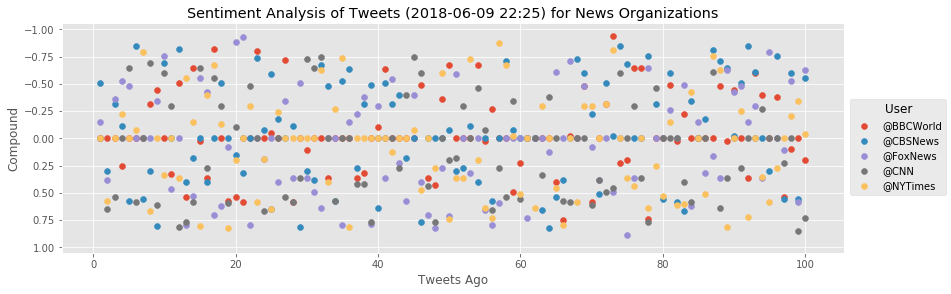

In [19]:
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")


fg = seaborn.FacetGrid(data=sentiments_pd, hue='User', size=4, aspect=3, ylim={-1.05, 1.05})
fg.map(plt.scatter, 'Tweets Ago', 'Compound').add_legend()
plt.title(f"Sentiment Analysis of Tweets ({now}) for News Organizations")
plt.savefig('scatter.png')

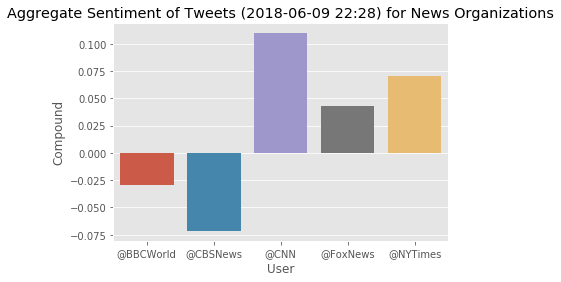

In [23]:
# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")


fg = seaborn.barplot(x="User", y="Compound", data=mean_sentiments);
plt.title(f"Aggregate Sentiment of Tweets ({now}) for News Organizations")
plt.savefig('bargraph.png')
